<a href="https://colab.research.google.com/github/Gaurav-Yaduvanshi/Capstone-Project-2-Retail-Sales-Prediction/blob/main/Capstone_Project_2_Retail_Sales_Prediction_(Individual_notebook)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title : Retail Sales Prediction : Predicting sales of a major store chain Rossmann
# Problem Description
### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.
# Data Description
## Rossmann Stores Data.csv - historical data including Sales
## store.csv - supplemental information about the stores
# Data fields
### Id - an Id that represents a (Store, Date) duple within the test set
### Store - a unique Id for each store
### Sales - the turnover for any given day (this is what you are predicting)
### Customers - the number of customers on a given day
### Open - an indicator for whether the store was open: 0 = closed, 1 = open
### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a=public holiday, b=Easter holiday, c=Christmas, 0=None
### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
### StoreType - differentiates between 4 different store models: a, b, c, d
### Assortment - describes an assortment level: a = basic, b = extra, c = extended
### CompetitionDistance - distance in meters to the nearest competitor store
### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
### Promo - indicates whether a store is running a promo on that day
### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
file1 = '/content/drive/MyDrive/Almabetter/Retail Sales Prediction Capstone Project-2/'
RS_df = pd.read_csv(file1 + 'Rossmann Stores Data.csv')

In [5]:
file2 = '/content/drive/MyDrive/Almabetter/Retail Sales Prediction Capstone Project-2/'
S_df = pd.read_csv(file2 + 'store.csv')

# DATA PREPROCESSING

In [6]:
RS_df.shape,S_df.shape

((1017209, 9), (1115, 10))

In [7]:
RS_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
RS_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
RS_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [10]:
S_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
S_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
S_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## DATA CLEANING

In [13]:
# Checking Null values
S_df.isna().sum()


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are many Nan values in columns -'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'. Also CompetitionDistance has only 3 null values.

In [14]:
# duplicates in Store.csv
len(S_df[S_df.duplicated()])

0

In [15]:
# duplicates in Rossmann Stores Data.csv
len(RS_df[RS_df.duplicated()])

0

In [16]:
# Null values of CompetitionDistance 
S_df[pd.isna(S_df.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [17]:
# Replacing Null values in CompetitionDistance with median.
S_df['CompetitionDistance'].fillna(S_df['CompetitionDistance'].median(), inplace = True)

In [18]:
# Replacing Null values with 0 in CompetitionOpenSinceMonth
S_df['CompetitionOpenSinceMonth'] = S_df['CompetitionOpenSinceMonth'].fillna(0)

# Replacing Nan values with 0 in CompetitionOpenSinceYear
S_df['CompetitionOpenSinceYear'] = S_df['CompetitionOpenSinceYear'].fillna(0)

# Replacing Nan values with 0 in Promo2SinceWeek
S_df['Promo2SinceWeek'] = S_df['Promo2SinceWeek'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceYear
S_df['Promo2SinceYear'] = S_df['Promo2SinceYear'].fillna(0)

## Replacing Nan values with 0 in PromoInterval
S_df['PromoInterval'] = S_df['PromoInterval'].fillna(0)

## Now checking Nan values
S_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [19]:

# Changing StateHoliday dtype from object to int.
RS_df.loc[RS_df['StateHoliday'] == '0', 'StateHoliday'] = 0
RS_df.loc[RS_df['StateHoliday'] == 'a', 'StateHoliday'] = 1
RS_df.loc[RS_df['StateHoliday'] == 'b', 'StateHoliday'] = 2
RS_df.loc[RS_df['StateHoliday'] == 'c', 'StateHoliday'] = 3
RS_df['StateHoliday'] = RS_df['StateHoliday'].astype(int, copy=False)

RS_df['StateHoliday'].dtype

dtype('int64')

In [20]:
# Changing Assortment dtype to int.
S_df.loc[S_df['PromoInterval'] == 'Jan,Apr,Jul,Oct', 'PromoInterval'] = 1
S_df.loc[S_df['PromoInterval'] == 'Feb,May,Aug,Nov', 'PromoInterval'] = 2
S_df.loc[S_df['PromoInterval'] == 'Mar,Jun,Sept,Dec', 'PromoInterval'] = 3
S_df['PromoInterval'] = S_df['PromoInterval'].astype(int, copy=False)

S_df['PromoInterval'].dtype

dtype('int64')

In [21]:
# Store column is common in both the datasets
# Merging both datasets
df = pd.merge(RS_df,S_df , on = 'Store', how ='left')

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [22]:
df.shape

(1017209, 18)

In [23]:
# Changing StoreType and Assortment
df['StoreType'] = df['StoreType'].map({'a':1,'b':2,'c':3,'d':4})
df['Assortment'] = df['Assortment'].map({'a':0, 'c':1,'b':2})


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [25]:
# Extract year, month, day and from "Date"
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Day'] = df['Date'].apply(lambda x: x.day)
df.drop('Date',axis=1,inplace=True)

In [26]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,5263,555,1,1,0,1,3,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,6064,625,1,1,0,1,1,0,570.0,11.0,2007.0,1,13.0,2010.0,1,2015,7,31
2,3,5,8314,821,1,1,0,1,1,0,14130.0,12.0,2006.0,1,14.0,2011.0,1,2015,7,31
3,4,5,13995,1498,1,1,0,1,3,1,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,4822,559,1,1,0,1,1,0,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31


In [27]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.05,0.18,2.21,0.48,5422.02,4.93,1370.17,0.50,11.65,1007.01,0.81,2013.83,5.85,15.70
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.52,7706.92,4.28,935.36,0.50,15.32,1005.88,0.98,0.78,3.33,8.79
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,2013.00,1.00,1.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00,0.00,1.00,0.00,710.00,0.00,0.00,0.00,0.00,0.00,0.00,2013.00,3.00,8.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00,0.00,1.00,0.00,2325.00,4.00,2006.00,1.00,1.00,2009.00,1.00,2014.00,6.00,16.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00,0.00,4.00,1.00,6880.00,9.00,2011.00,1.00,22.00,2012.00,1.00,2014.00,8.00,23.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,3.00,1.00,4.00,2.00,75860.00,12.00,2015.00,1.00,50.00,2015.00,3.00,2015.00,12.00,31.00


In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day'],
      dtype='object')

# EDA

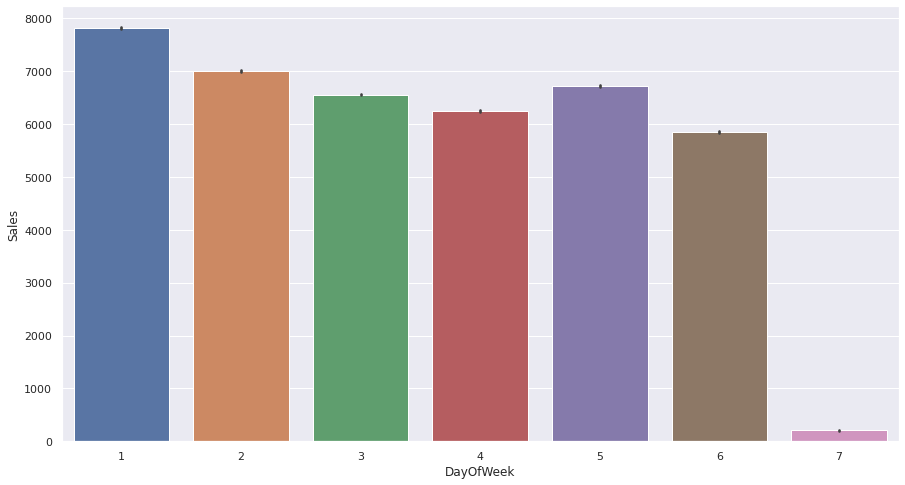

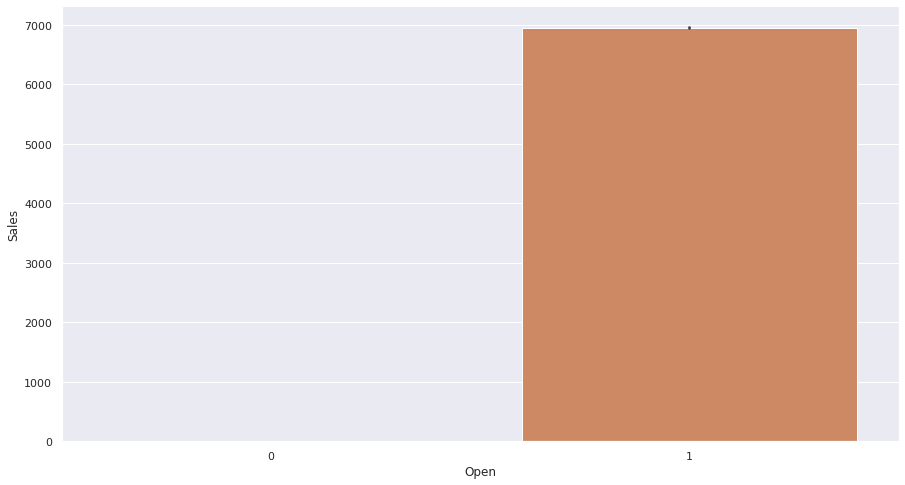

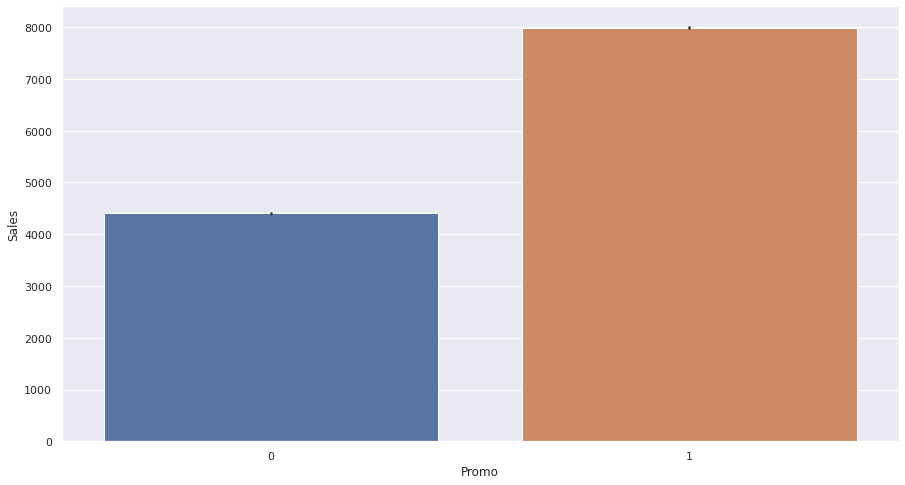

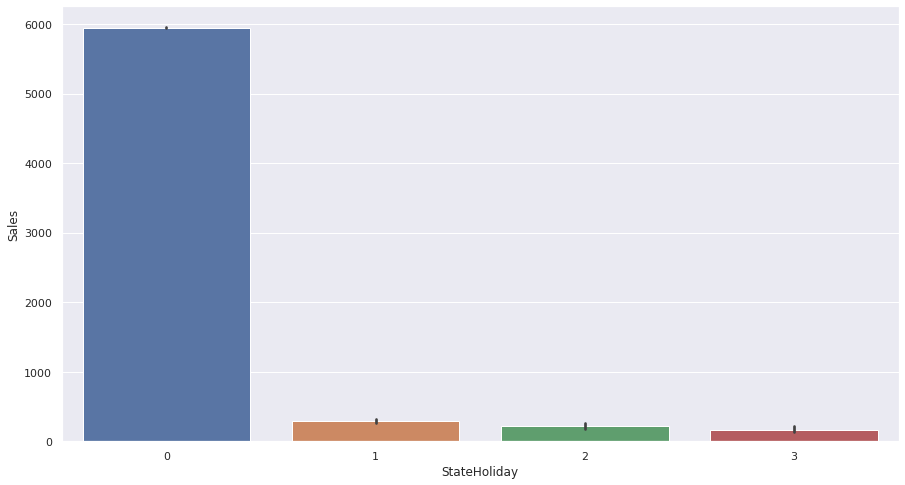

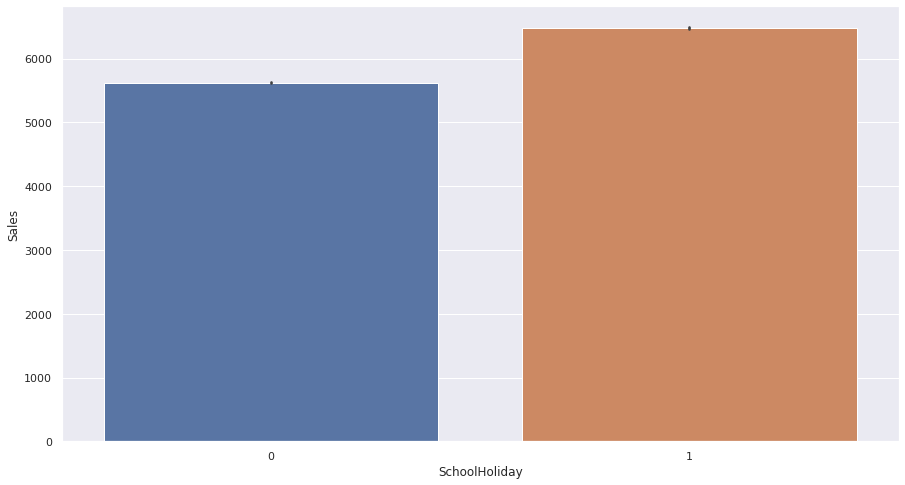

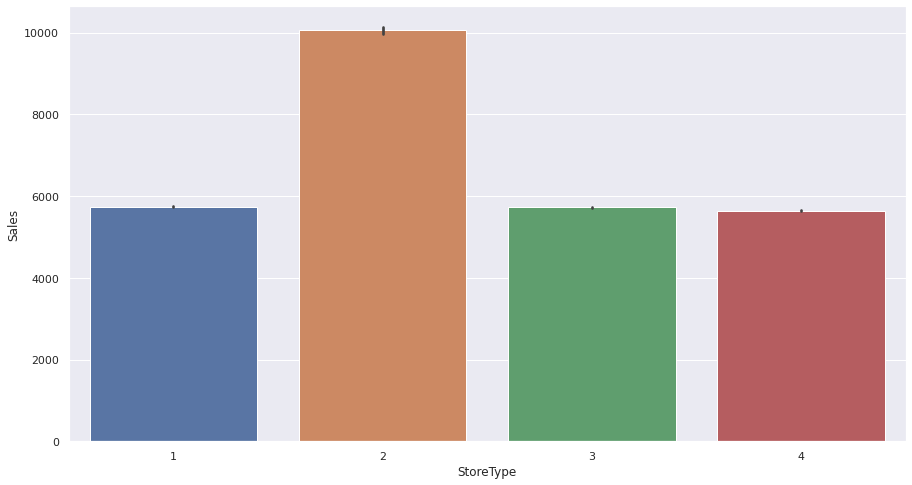

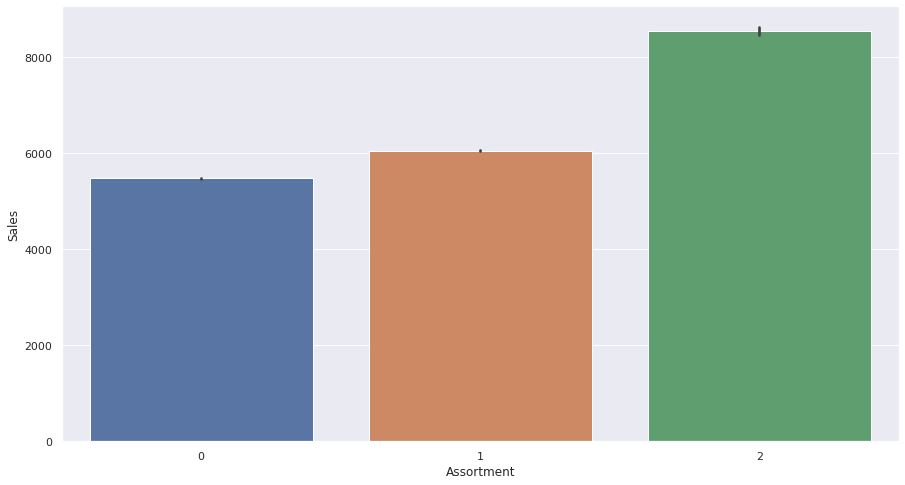

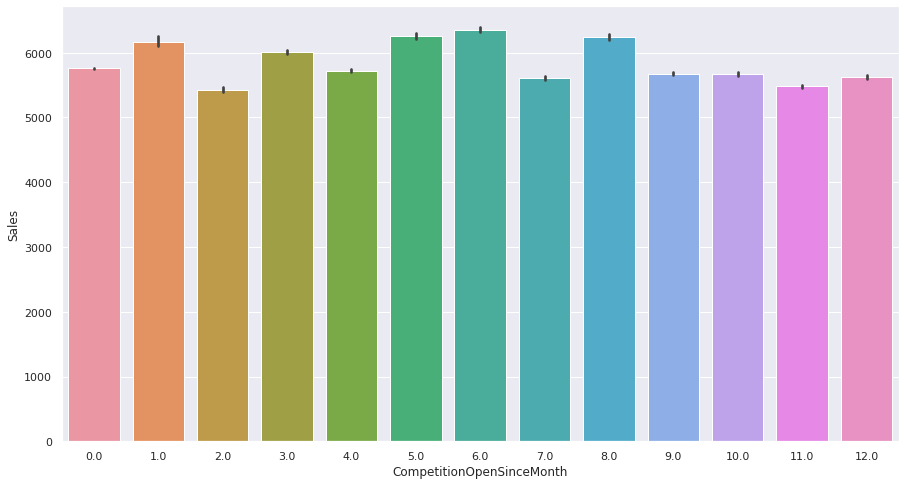

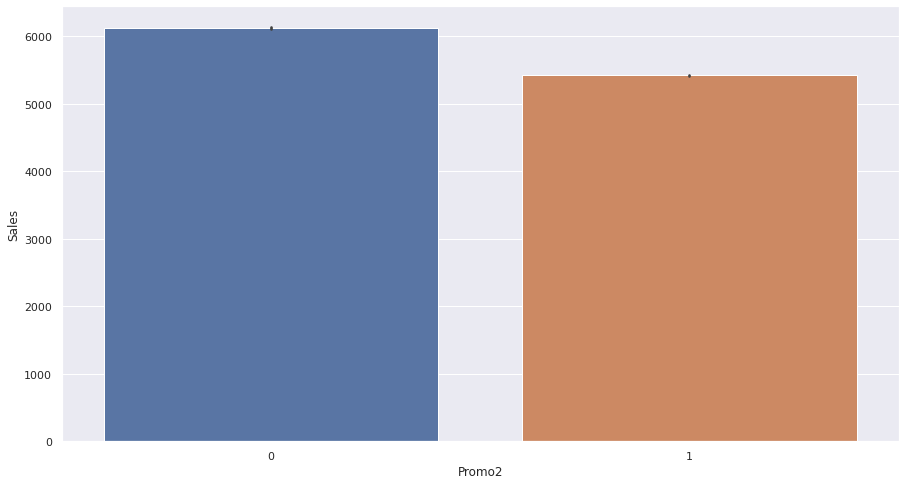

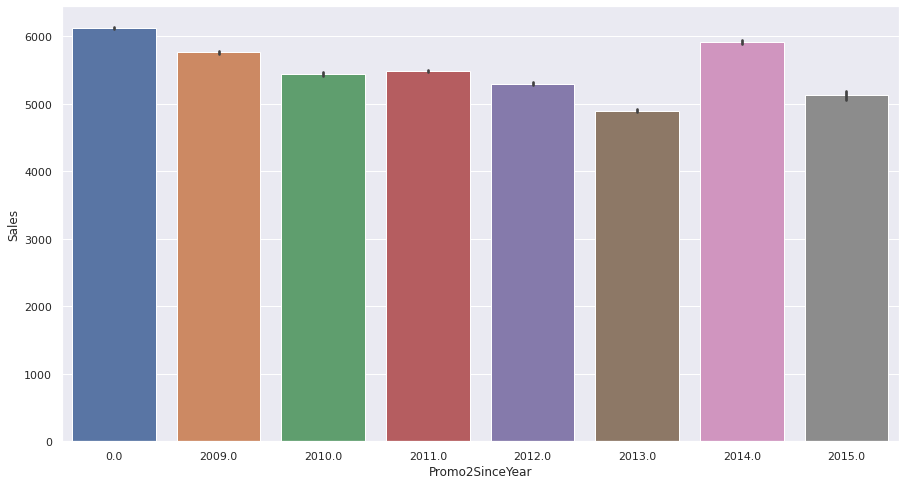

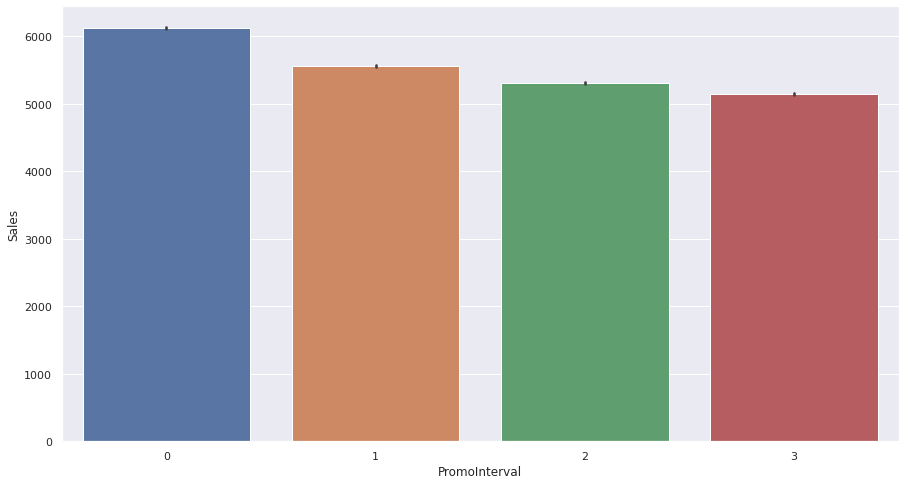

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df[value], y=df['Sales'])
  plt.show()   

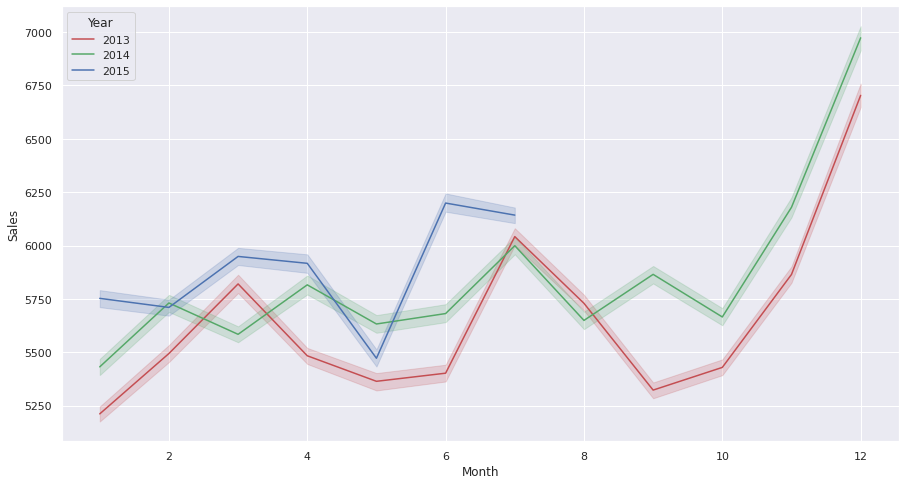

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x ='Month', y='Sales', hue='Year',palette=['r', 'g', 'b'])
plt.show()

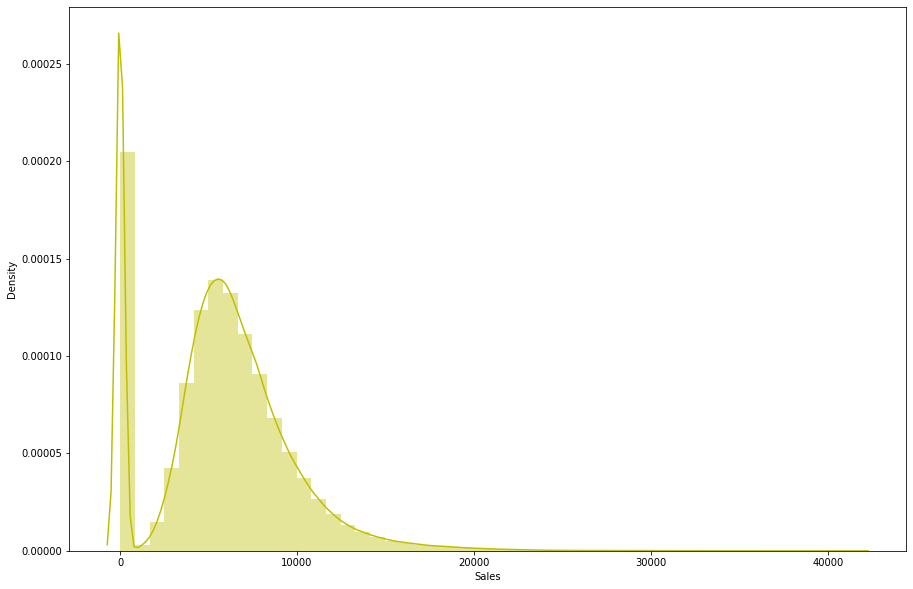

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df['Sales'],color="y")

In [ ]:
dfcount = (df['Sales'] < 20000).value_counts()
dfcount

True     1013109
False       4100
Name: Sales, dtype: int64

In [ ]:
logsales = np.log10(df['Sales'])


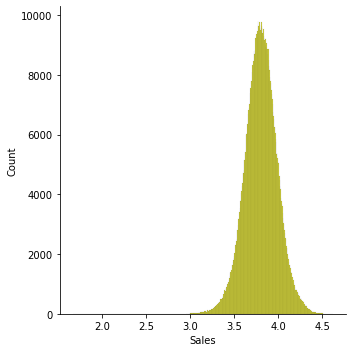

In [ ]:
sns.displot(logsales,color="y")

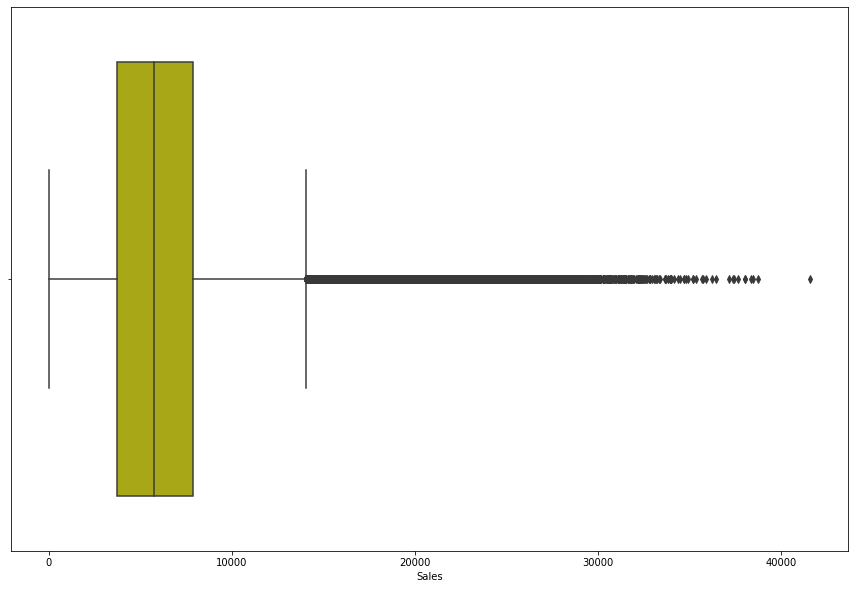

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(df['Sales'],color="y")

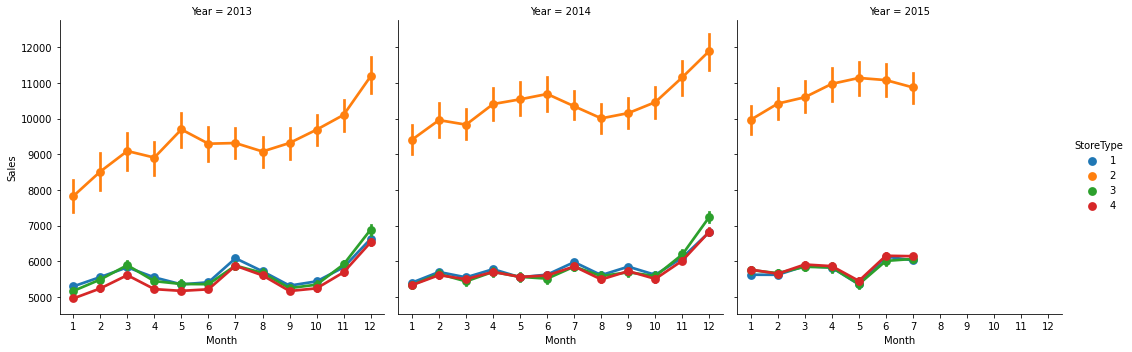

In [ ]:
sns.factorplot(data = df, x = "Month", y = "Sales", col = "Year", hue = "StoreType")

<Figure size 864x432 with 0 Axes>

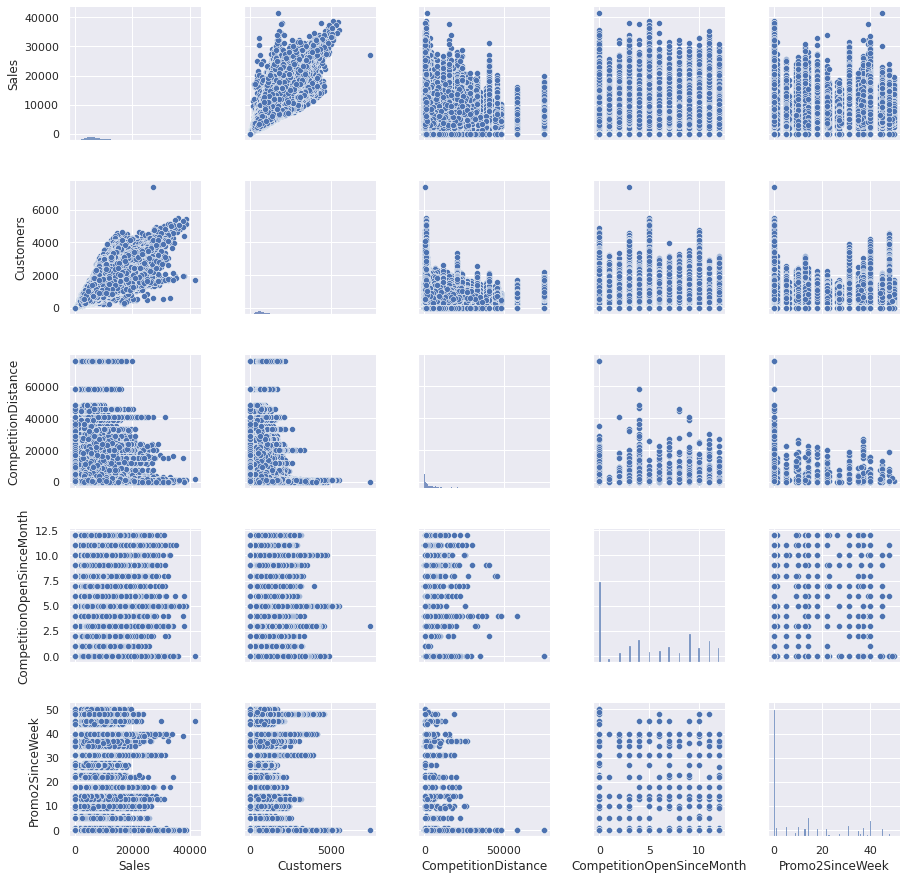

In [ ]:
g = sns.PairGrid(df[['Sales','Customers','CompetitionDistance', 'CompetitionOpenSinceMonth', 'Promo2SinceWeek']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

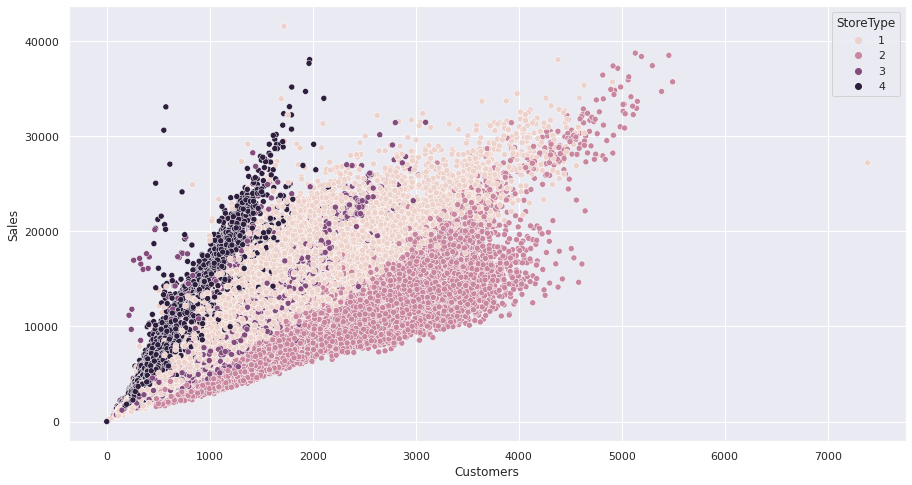

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='Customers',y='Sales',hue='StoreType')
plt.show()

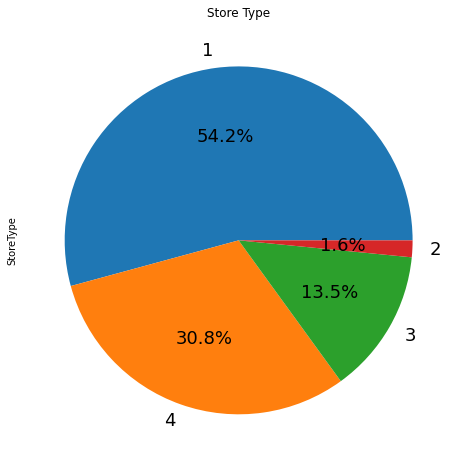

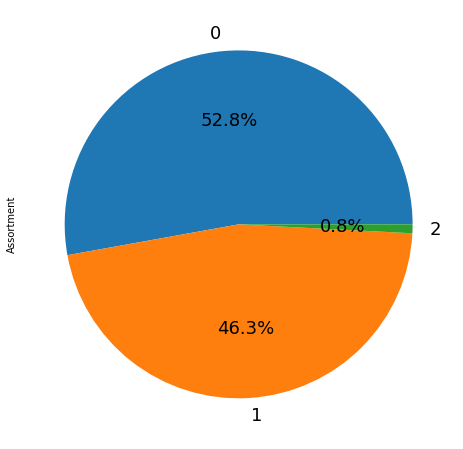

In [ ]:
percent = df["StoreType"].value_counts()
percent.plot.pie(fontsize= 18,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 20})
plt.title('Store Type')
plt.show()

percent = df["Assortment"].value_counts()
percent.plot.pie(fontsize= 18,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 20})
plt.show()

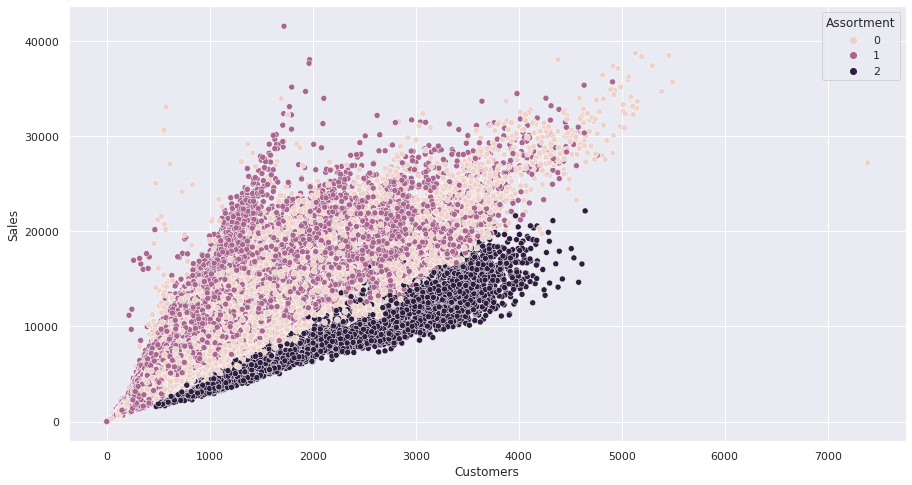

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='Customers',y='Sales',hue='Assortment')
plt.show()

In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day'],
      dtype='object')

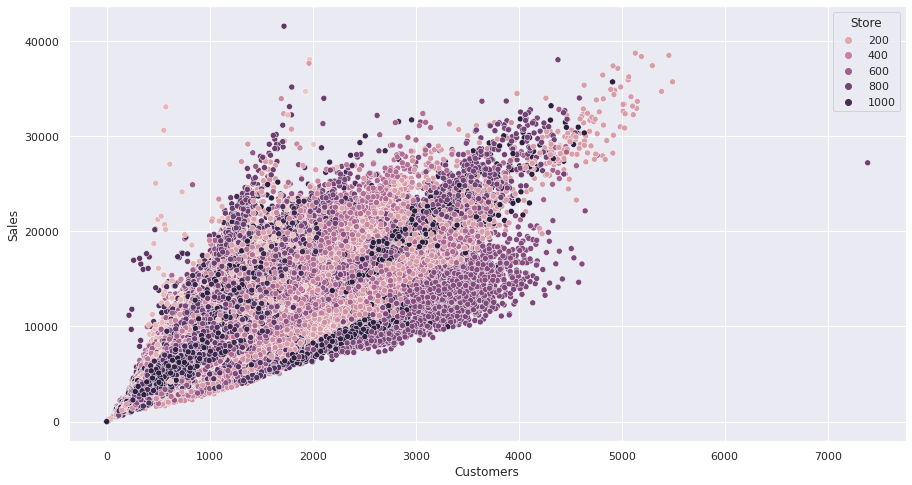

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='Customers',y='Sales',hue='Store')
plt.show()

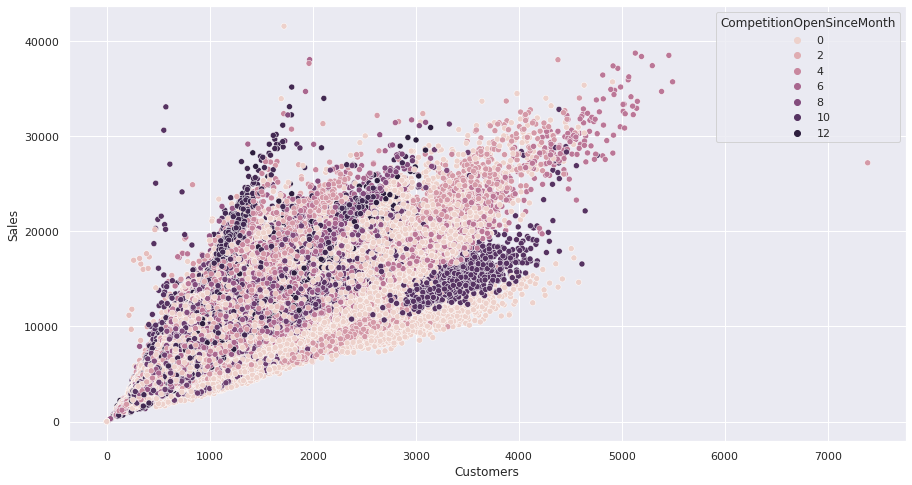

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='Customers',y='Sales',hue='CompetitionOpenSinceMonth')
plt.show()

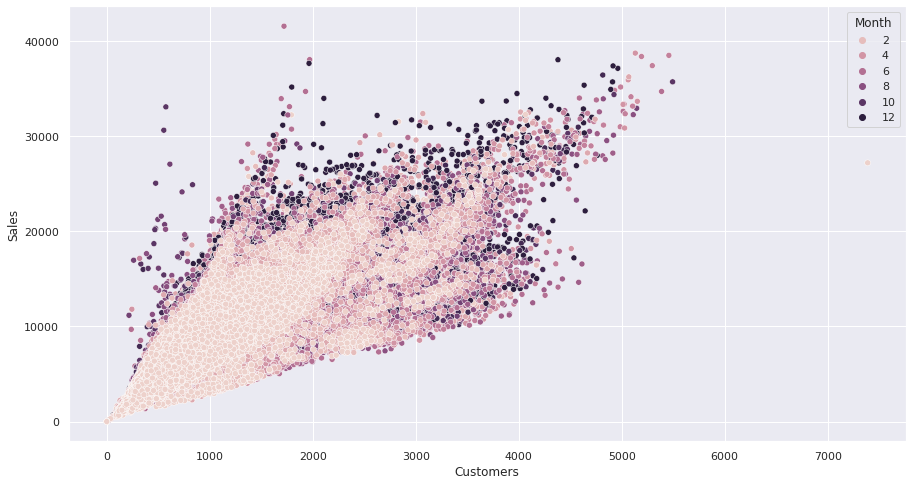

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='Customers',y='Sales',hue='Month')
plt.show()

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment Level')

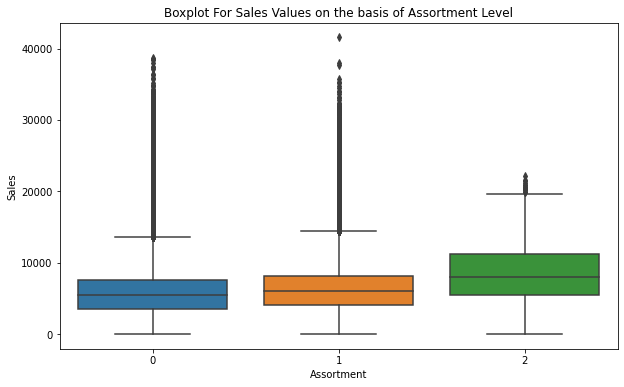

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Assortment", y="Sales", data=df)
plt.title('Boxplot For Sales Values on the basis of Assortment Level')

Text(0.5, 1.0, 'Boxplot For Sales Values')

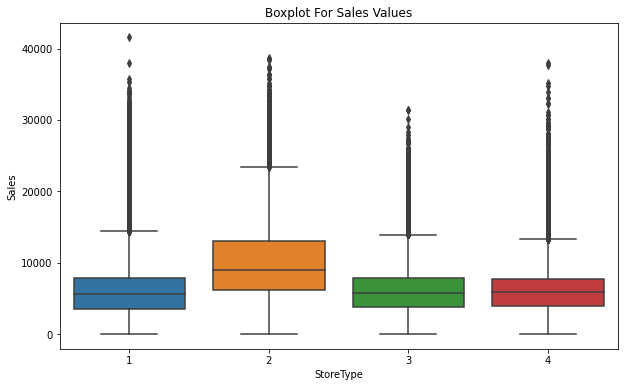

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="StoreType", y="Sales", data=df)
plt.title('Boxplot For Sales Values')

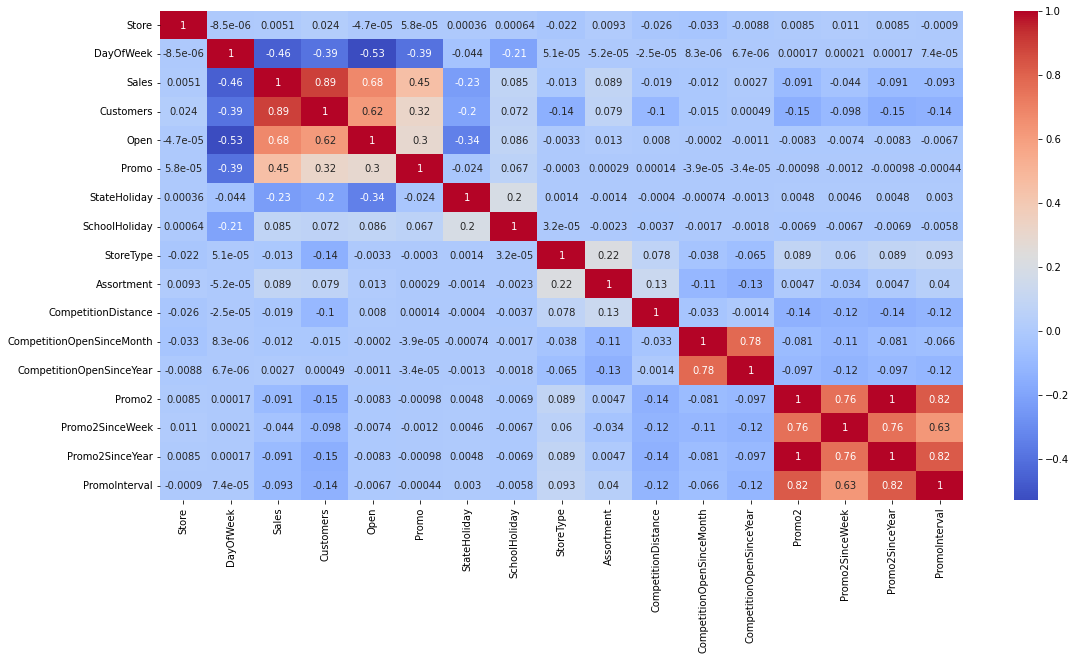

In [ ]:
corr_df = df[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']].corr()
plt.figure(figsize=(18,9))
sns.heatmap(corr_df,cmap='coolwarm',annot=True)
plt.show()

# Conclusion
### 1. Rossmann Stores Data.csv dataset has 10,107,219 rows and 10 columns. store.csv dataset has 1115 rows and 9 columns. 
### 2. 
### 3.
### 4.
### 5.

# Feature Selection and regression



In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [29]:
# Create the data of independent variables
dependent_variable = 'Sales'
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
X = df[independent_variables].values

# Create the dependent variable data
y = df[dependent_variable].values

In [30]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [34]:
from numpy import math
math.sqrt(mean_squared_error(y_test, y_pred))

1398.7571422702504

In [61]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.8675944749595368


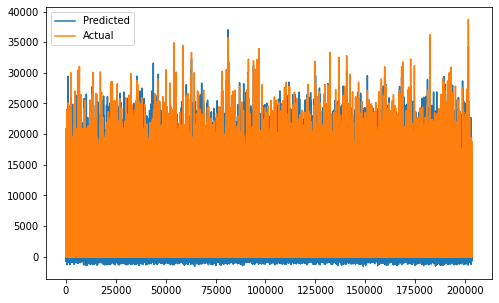

In [36]:
plt.figure(figsize=(8,5))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
#promo,promo2,compmonth

## Experment


In [ ]:
copy_df = df.copy()

In [ ]:
copy_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
copy_df.drop(['Customers', 'Open','Promo2SinceYear', 'PromoInterval','Promo2SinceWeek','CompetitionOpenSinceYear','CompetitionDistance','CompetitionOpenSinceMonth'],axis = 1,inplace=True)

In [ ]:
# Create the data of independent variables
dependent_variable = copy_df['Sales']
# Create a list of independent variables
inco = copy_df.drop('Sales',axis=1)
independent_variables = inco
X = independent_variables

# Create the dependent variable data
y = dependent_variable

In [ ]:
X.shape

(1017209, 11)

In [ ]:
y.shape

(1017209,)

In [ ]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   Store          1017209 non-null  int64
 1   DayOfWeek      1017209 non-null  int64
 2   Sales          1017209 non-null  int64
 3   Promo          1017209 non-null  int64
 4   StateHoliday   1017209 non-null  int64
 5   SchoolHoliday  1017209 non-null  int64
 6   StoreType      1017209 non-null  int64
 7   Assortment     1017209 non-null  int64
 8   Promo2         1017209 non-null  int64
 9   Year           1017209 non-null  int64
 10  Month          1017209 non-null  int64
 11  Day            1017209 non-null  int64
dtypes: int64(12)
memory usage: 133.1 MB


In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
from numpy import math
math.sqrt(mean_squared_error(y_test, y_pred))

3031.771617488083

In [ ]:
r2_score(y_test, y_pred)

0.37796554772610513

## Decision Tree

In [41]:
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [38]:
# Create the data of independent variables
#dependent_variable = 'Sales'
# Create a list of independent variables
#independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
#X = df[independent_variables].values

# Create the dependent variable data
#y = df[dependent_variable].values

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
Decision_tree = DecisionTreeRegressor()
Decision_tree_reg = Decision_tree.fit(X_train, y_train)

In [50]:
Regresion_Model_Score = Decision_tree_reg.score(X_train, y_train)
Test_Score = Decision_tree_reg.score(X_test, y_test)
print(Regresion_Model_Score)
print(Test_Score)

1.0
0.973818745955541


## Decision Tree With Hyper Parameter Tuning

In [46]:
Decision_tree1= DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
Decision_tree_reg1 = Decision_tree1.fit(X_train, y_train)

In [51]:
Regresion_Model_Score = Decision_tree_reg1.score(X_train, y_train)
Test_Score = Decision_tree_reg1.score(X_test, y_test)
print(Regresion_Model_Score)
print(Test_Score)

0.9880472459707023
0.9779538366809143


## EXP 2

In [ ]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [ ]:

# Obtain accuracy on train set
accuracy_score(Y_train,train_preds)

In [ ]:
# Obtain accuracy on test set
accuracy_score(Y_test,test_preds)

In [ ]:
# Calculate roc_auc score on train set
roc_auc_score(Y_train,train_preds)

In [ ]:
# Calculate roc_auc score on test set
roc_auc_score(Y_test,test_preds)

In [ ]:
# Obtain the confusion matrix on train set
confusion_matrix(Y_train,train_preds)
     

In [ ]:
# Obtain the confusion matrix on test set
confusion_matrix(Y_test,test_preds)
     


## Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [ ]:
#I trained Model with hyper parameters..to not run everytime i record the result
#Here are our best parameters for Random Forest
#{ n_estimators=80,min_samples_split=2,min_samples_leaf=1,max_depth=None }

In [ ]:
# Create the RandomForestClassifier
#rf_model = RandomForestClassifier()
#rf_grid.fit(X_train,Y_train)

In [52]:
#Random Forest with Parameters
rdf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg = rdf.fit(X_train, y_train)

In [55]:
RDF_Score = rdfreg.score(X_train, y_train)
Test_Score1 = rdfreg.score(X_test, y_test)

In [56]:
print(RDF_Score)
print(Test_Score1)

0.9981717078801922
0.9866483877932046


# Conclusion

In [68]:
Test_Score_df = pd.DataFrame({'Regressions':['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor'],'Test_Score':[r2,Test_Score,Test_Score1]})

In [69]:
Test_Score_df

,Regressions,Test_Score
0,LinearRegression,0.867594
1,DecisionTreeRegressor,0.977954
2,RandomForestRegressor,0.986648
